Equipo: 8  
Grupo: 002 , Clase: Miércoles 6pm-9pm  
Integrantes:   
1723152, Javier Eduardo Salazar Segura.  
1806169, Víctor Hugo Cantú Chávez.  
1735532, Damián Atilano Martínez Alvarado.  
# Práctica de Visualización de Datos
# Visualización Base de datos principal
Base de datos: International football results https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017

In [52]:
import pandas as pd
import numpy as np
mx=pd.read_csv("Solo_Mex.csv")
mxar=pd.read_csv("Solo_MexAR.csv")
mxbr=pd.read_csv("Solo_MexBR.csv")
mxus=pd.read_csv("Solo_MexUS.csv")

mx.head()

,date,local,visita,gol_home,gol_away,torneo,city,pais,neutral,df,vic,gana,pierde,empata
0,9/12/1923,Mexico,Guatemala,2,1,Friendly,Mexico City,Mexico,FALSO,1,1,1,0,0
1,12/12/1923,Mexico,Guatemala,2,0,Friendly,Mexico City,Mexico,FALSO,2,1,1,0,0
2,16/12/1923,Mexico,Guatemala,3,3,Friendly,Mexico City,Mexico,FALSO,0,3,0,0,1
3,4/3/1934,Mexico,Cuba,3,2,FIFA World Cup qualification,Mexico City,Mexico,FALSO,1,1,1,0,0
4,11/3/1934,Mexico,Cuba,5,0,FIFA World Cup qualification,Mexico City,Mexico,FALSO,5,1,1,0,0


Se recuperó la información de los archivos que habíamos generado para la limpieza de datos de el avnce 1 del proyecto. Teniendo así las tablas correspondientes a cada caso que analizaremos. 

# Estadística Básica de los datos
se obtendrá información de los datos usando algunas funciones de estadítica básica de python.

In [3]:
mx['gana'].sum()

442

In [4]:
mx.shape

(873, 14)

In [5]:
mxloc=mx[mx['local']=='Mexico']
mxloc.shape

(515, 14)

In [6]:
mxloc["gana"].sum()

303

In [7]:
mxvst=mx[mx['visita']=='Mexico']
mxvst.shape

(358, 14)

In [8]:
mxvst["gana"].sum()

139

Facilmente usando la funcion sum() y shape() pudimos contar el numero de partidos que México ganó como local que es 303 victorias de 515 partidos jugados y como visitante ganó solamente 139 partidos de 358 jugados.

In [9]:
mxloc["gol_home"].mean()

2.0

In [10]:
mxvst["gol_away"].mean()

1.3743016759776536

In [11]:
1-(mxvst["gol_away"].mean()/mxloc["gol_home"].mean())

0.3128491620111732

Usando la función mean() también obtenemos otro dato interesante, la media de goles anotados por México como Local es de 2 y la media de goles anotados como visitante es de 1.3743. Siendo la media de goles de visitante un 31% menor a la de goles como local, aproximadamente.

In [53]:
mx.index = mx.index + 1 # por efectos practicos reescribimos el indice para empezar a contar desde 1
mx['gana'].cumsum()

1        1
2        2
3        2
4        3
5        4
      ... 
869    438
870    439
871    440
872    441
873    442
Name: gana, Length: 873, dtype: int64

Con ayuda de la función cumsum se puede generar una tabla interesante que muestra las victorias que México lleva acumuladas y el numero de partidos disputados. Con una tabla como esta se podría usar para observar como ha evolucionado la proporación de victorias de México a lo largo de todos los partidos que ha disputado. Se observa que para su partido número 5 habían ganado 4 y para su partido 870 habían ganado 439. 

In [13]:
mxloc['gol_home'].describe()

count    515.000000
mean       2.000000
std        1.800346
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: gol_home, dtype: float64

In [14]:
mxvst['gol_away'].describe()

count    358.000000
mean       1.374302
std        1.410091
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: gol_away, dtype: float64

Aqui se usa la función describe() y con ella podemos comparar distintas estadísticas sobre el número de goles anotado por México tanto de Local como de visita. 

A continuación usa veremos otras funciones estadísticas que pueden servir. Se aplicarán sobre los goles en contra que ha recibido México como local.

In [15]:
mxloc['gol_away'].count()

515

In [16]:
mxloc['gol_away'].min()

0

In [17]:
mxloc['gol_away'].max()

7

In [18]:
mxloc['gol_away'].median()

1.0

In [19]:
mxloc['gol_away'].var()


1.1718635487892393

In [20]:
mxloc['gol_away'].std()


1.0825264656299352

In [21]:
mxloc['gol_away'].skew()

1.5571216566907984

In [22]:
mxloc['gol_away'].kurt()

3.2764702888463377

In [23]:
mxloc['gol_away'].sum()

466

In [24]:
mxloc['gol_away'].mean()

0.9048543689320389

In [25]:
mx.cov()

,gol_home,gol_away,df,vic,gana,pierde,empata
gol_home,2.733212,-0.318051,3.051263,-0.400324,0.211045,-0.021765,-0.189279
gol_away,-0.318051,1.558170,-1.876220,-0.041898,-0.003481,0.048860,-0.045379
df,3.051263,-1.876220,4.927483,-0.358426,0.214526,-0.070625,-0.143900
vic,-0.400324,-0.041898,-0.358426,0.661089,-0.366951,0.072814,0.294138
gana,0.211045,-0.003481,0.214526,-0.366951,0.250247,-0.133542,-0.116704
pierde,-0.021765,0.048860,-0.070625,0.072814,-0.133542,0.194271,-0.060729
empata,-0.189279,-0.045379,-0.143900,0.294138,-0.116704,-0.060729,0.177433


In [26]:
mx.corr()

,gol_home,gol_away,df,vic,gana,pierde,empata
gol_home,1.000000,-0.154118,0.831439,-0.297814,0.255184,-0.029869,-0.271800
gol_away,-0.154118,1.000000,-0.677117,-0.041281,-0.005575,0.088806,-0.086304
df,0.831439,-0.677117,1.000000,-0.198590,0.193189,-0.072185,-0.153898
vic,-0.297814,-0.041281,-0.198590,1.000000,-0.902182,0.203180,0.858822
gana,0.255184,-0.005575,0.193189,-0.902182,1.000000,-0.605663,-0.553842
pierde,-0.029869,0.088806,-0.072185,0.203180,-0.605663,1.000000,-0.327093
empata,-0.271800,-0.086304,-0.153898,0.858822,-0.553842,-0.327093,1.000000


In [27]:
df=mx['gana'].cumsum()
proba=pd.DataFrame(df)
proba

,gana
1,1
2,2
3,2
4,3
5,4
...,...
869,438
870,439
871,440
872,441


In [28]:
serie=proba['gana'] / proba.index
serie.to_csv("probmex.csv")
serie

1      1.000000
2      1.000000
3      0.666667
4      0.750000
5      0.800000
         ...   
869    0.504028
870    0.504598
871    0.505166
872    0.505734
873    0.506300
Length: 873, dtype: float64

# Gráficas de visualización de datos.

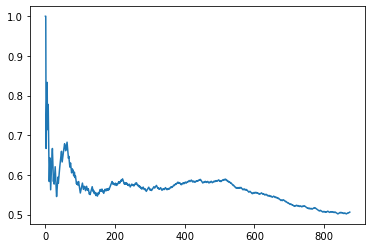

In [29]:


serie.plot.line()

La siguiente grafica muestra la evolución de la probabilidad a medida que incrementa el número de partidos jugados

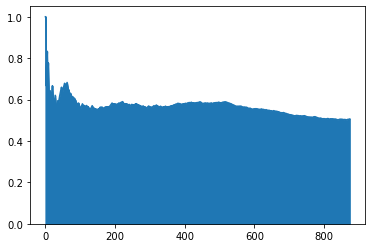

In [30]:
serie.plot.area()

tenemos el mismo gráfico de linea  pero rellenadno el área bajo la curva.

In [31]:
mxlocserie=mxloc["gol_home"]
mxlocserie.index=mxlocserie.index+1
mxlocserie

1      2
2      2
3      3
4      3
5      5
      ..
511    2
512    3
513    2
514    2
515    3
Name: gol_home, Length: 515, dtype: int64

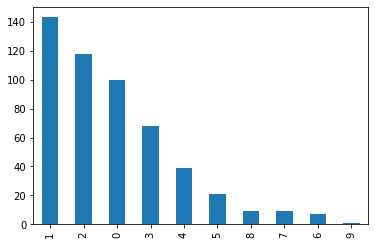

In [32]:
mxloc['gol_home'].value_counts().head(10).plot.bar()

La siguiente grafica muestra la cantidad de partidos en los que México en sus 515 partidos como local anoto cierto número de goles, observamos que México ha anotado solo 1 gol en 140 partidos y  en 100 partidos no ha anotado ningun gol. 

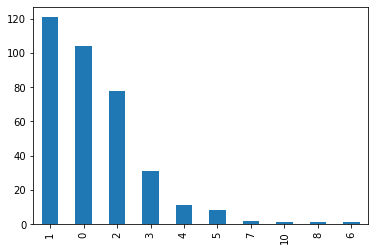

In [33]:
mxvst['gol_away'].value_counts().head(10).plot.bar()

Este es el gráfico análogo para los 358 partidos de México como visitante. Vemos que como visitante México tiene mayor proporción de partidos con 0 goles, si bien tanto de local como visitante el número de partidos con 0 goles es cercano a 100, la proproción como visitante es mayor ya que son 100 partidos de 358 y como local son 100 partidos de 515. 

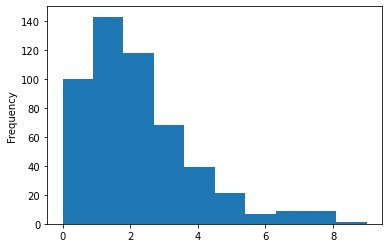

In [34]:
mxloc['gol_home'].plot.hist()

Histograma de la cantidad de goles de mexico jugando como local, puede servir para encontrar la distribución de probabilidad

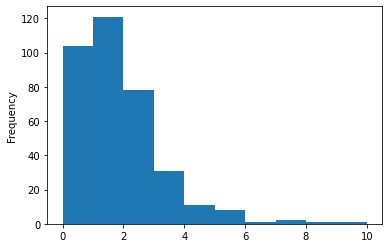

In [35]:
mxvst['gol_away'].plot.hist()


Histograma de la cantidad de goles de mexico jugando como visita, puede servir para encontrar la distribución de probabilidad

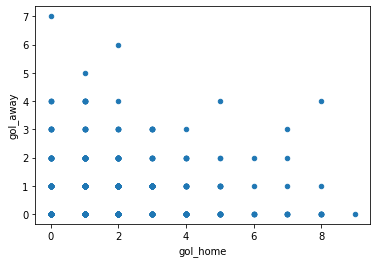

In [36]:
mxloc.plot.scatter(x="gol_home",y="gol_away")

Grafico de la relación de la cantidad de goles de ambos equipos, se observa poca correlación

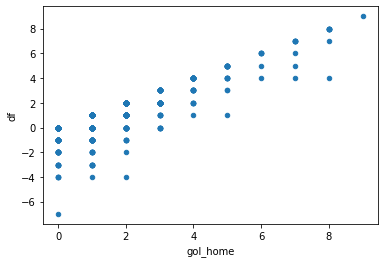

In [37]:
mxloc.plot.scatter(x="gol_home",y="df")

aqui se presentan dos scatter plot entre goles de local y visitante y otro entre los goles de local y la diferencia de goles. Siendo México el equipo local.

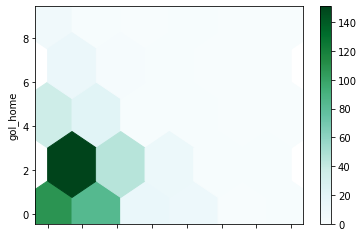

In [38]:
mxloc.plot.hexbin(x="gol_away",y="gol_home",gridsize=5)

México jugando como local. Se observa la combinación de goles de ambos equipos más frecuente.

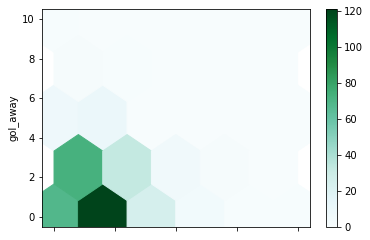

In [39]:
mxvst.plot.hexbin(x="gol_home",y="gol_away",gridsize=5)

México jugando como visitante. Se observa la combinación de goles de ambos equipos más frecuente.

Gracias a estas grafica podemos encontrar las combinacion de resultado del partido más comunes, siendo las zonas más oscuras más frecuentes que las zonas más claras.

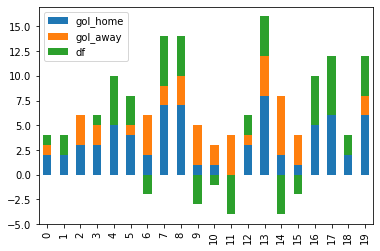

In [40]:
newmxloc= mxloc[['gol_home', 'gol_away', 'df']].copy()
newmxloc
newmxloc.head(20).plot.bar(stacked=True)

México como local

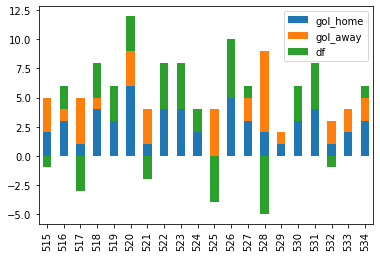

In [41]:
newmxvst= mxvst[['gol_home', 'gol_away', 'df']].copy()
newmxvst
newmxvst.head(20).plot.bar(stacked=True)

México como visitante

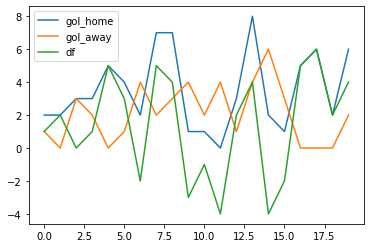

In [42]:

newmxloc.head(20).plot.line()

México como local

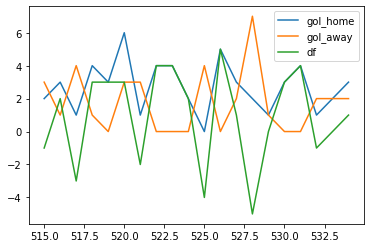

In [43]:
newmxvst.head(20).plot.line()

México como visitante

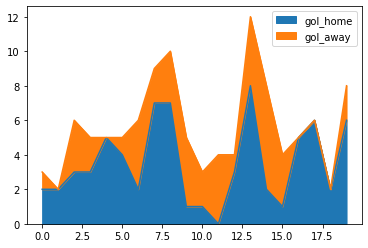

In [44]:
newmxloc2= mxloc[['gol_home', 'gol_away']].copy()
newmxloc2
newmxloc2.head(20).plot.area()

Se compara la frecuencia de la cantidad de goles de México ( gol_home) y la del rival.

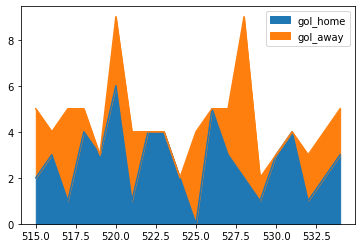

In [45]:
newmxvst2= mxvst[['gol_home', 'gol_away']].copy()
newmxvst2
newmxvst2.head(20).plot.area()

Se compara la frecuencia de la cantidad de goles de México ( gol_away) y la del rival.

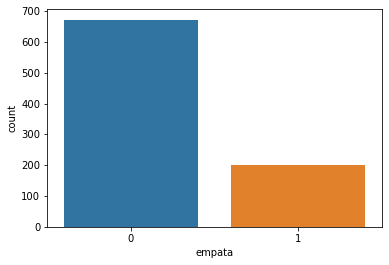

In [46]:
import seaborn as sns
sns.countplot(mx['empata'])

Este histograma cuenta la cantidad de veces que México ha emapatado un partido 1 , o 0 a Ganado o perdido.

# Kernel Density Estimate
aqui se muestran las graficas de KDE para cuando México gana, cuentos goles anotó. En ambos casos. Local y Visitante.

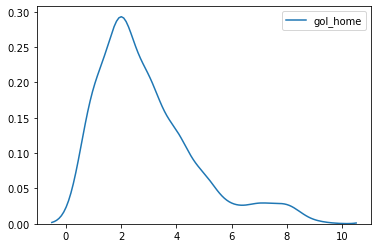

In [47]:
sns.kdeplot(mxloc[mxloc["gana"]==1].gol_home)

México ganando como local y en el eje X el número de goles anotados en ese partido ganado.

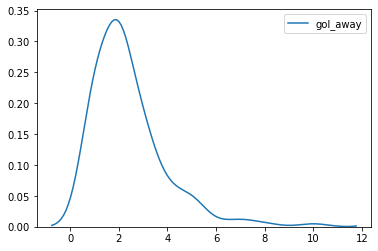

In [48]:
sns.kdeplot(mxvst[mxvst["gana"]==1].gol_away)

México ganando como visitante y en el eje X el número de goles anotados en ese partido ganado.

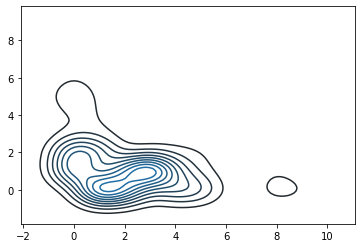

In [156]:
sns.kdeplot(mx[mx['gana'] ==1].loc[:, ['gol_home', 'gol_away']].dropna().sample(100))

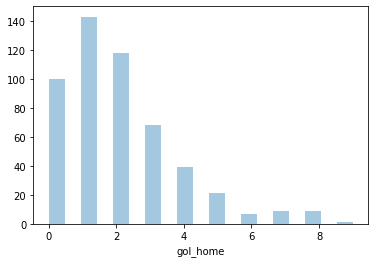

In [157]:
sns.distplot(mxloc['gol_home'], kde=False)

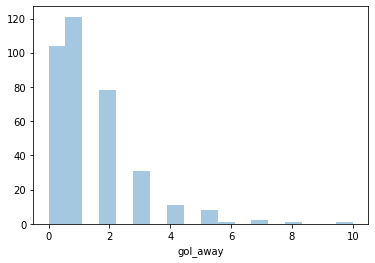

In [158]:
sns.distplot(mxvst['gol_away'], kde=False)

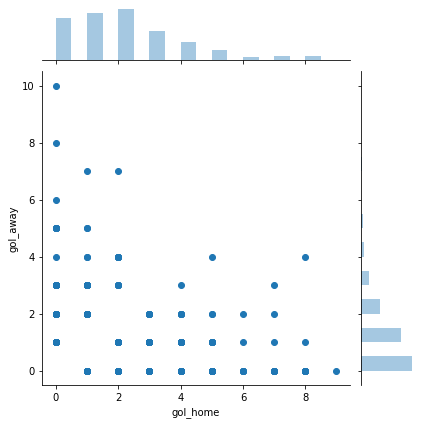

In [160]:
sns.jointplot(x='gol_home', y='gol_away', data=mx[mx['gana'] ==1])

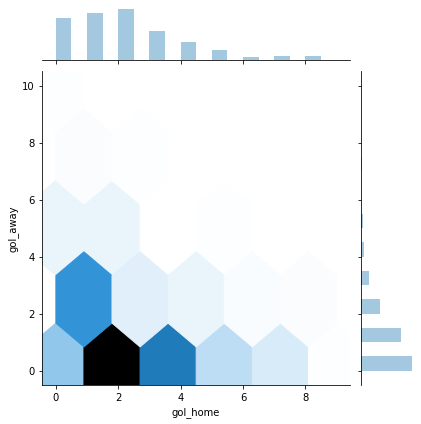

In [162]:
sns.jointplot(x='gol_home', y='gol_away', data=mx[mx['gana'] ==1],kind="hex",gridsize=5)

estas graficas relacionan el número de goles dl equipo local y el número de goles delequipo visitante, cuando México gana un partido, sin importar si juega como local o visita.

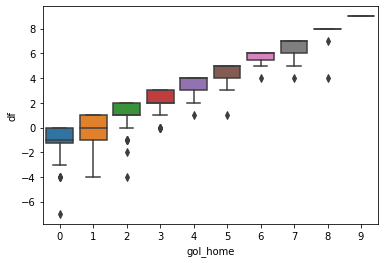

In [168]:


sns.boxplot(
    x='gol_home',
    y='df',
    data=newmxloc
)

Estas boxplots representan cuando México como local anota unca cierta cantidad de goles(eje x) . comparada con como terminó la diferencia de goles en ese partido (eje y) 

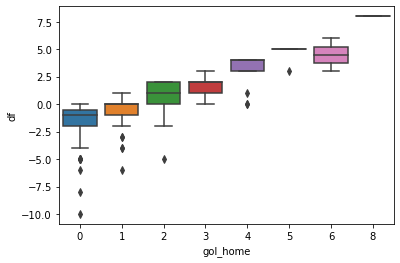

In [169]:
sns.boxplot(
    x='gol_home',
    y='df',
    data=newmxvst
)

Estas boxplost representan cuando México como visitante anota una cierta cantidad de goles(eje x) . comparada con como terminó la diferencia de goles en ese partido (eje y)

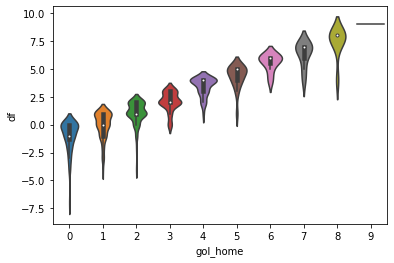

In [170]:
sns.violinplot(
    x='gol_home',
    y='df',
    data=newmxloc
)

Aqui en las gráfica de arriba y abajo se muestra la situación análoga a las boxplot anteriores pero usando la Violin plot.
Arriba es como local y abajo como visitante.

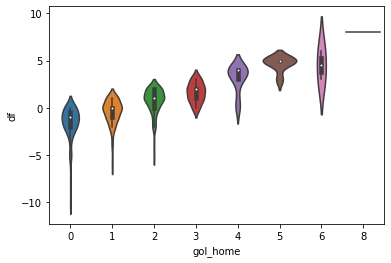

In [171]:
sns.violinplot(
    x='gol_home',
    y='df',
    data=newmxvst
)

como se indica arriba, datos de México como visita

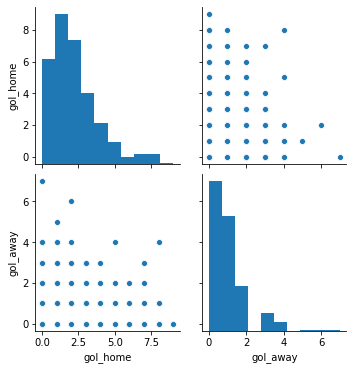

In [172]:
sns.pairplot(mxloc[['gol_home', "gol_away"]])

Pair plot de las relaciones entre los goles de mexico como local y los goles del rival.

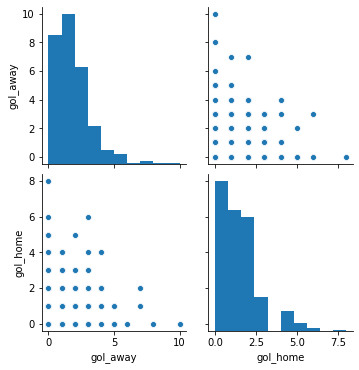

In [173]:
sns.pairplot(mxvst[['gol_away', "gol_home"]])

Pair plot de las relaciones entre los goles de mexico como visita y los goles del rival.

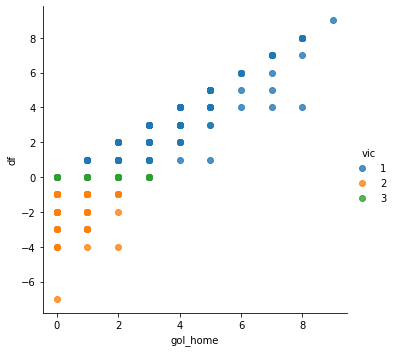

In [177]:
import matplotlib.pyplot as plt

sns.lmplot(x='gol_home', y='df', hue='vic', 
           data=mxloc, 
           fit_reg=False)

Grafica de la relación entre los goles Marcados por México en un partido como Local y la diferencia de goles en la que resultó el partido. En este caso una diferencia de goles (df) mayor a 0 indica que México ganó. Vic representa el resultado del partido siendo el 1 una victoria, 2 una derrota y 3 un empate.

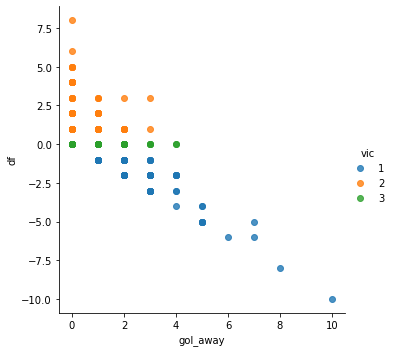

In [178]:
sns.lmplot(x='gol_away', y='df', hue='vic', 
           data=mxvst, 
           fit_reg=False)


Grafica de la relación entre los goles Marcados por México en un partido como vistante y la diferencia de goles en la que resultó el partido. En este caso una diferencia de goles (df) menor a 0 indica que México ganó. Vic representa el resultado del partido siendo el 1 una victoria, 2 una derrota y 3 un empate.

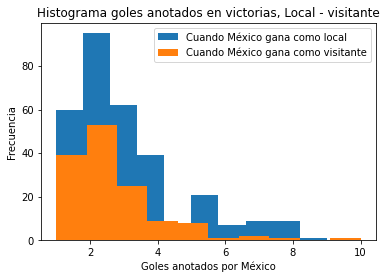

In [180]:
m = plt.hist(mxloc[mxloc["gana"] == 1].gol_home,label = "Cuando México gana como local")
b = plt.hist(mxvst[mxvst["gana"] == 1].gol_away,label = "Cuando México gana como visitante")
plt.legend()
plt.xlabel("Goles anotados por México")
plt.ylabel("Frecuencia")
plt.title("Histograma goles anotados en victorias, Local - visitante")
plt.show()

En este comparativo podemos ver que cuando México gana como local tiende a anotar más goles que cuando gana como visitante.

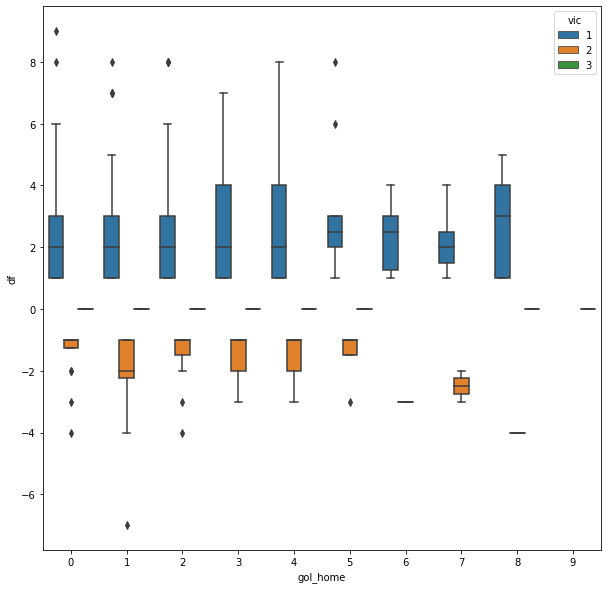

In [187]:

plt.figure(figsize = (10,10))
sns.boxplot(x = "gol_home", y = "df", hue="vic",data= mxloc)
plt.show()

En los gráficos anteriores se compara las boxplot de los distitnos casos 1: victoria, 2: derrota, 3: Empate. Comparando los goles anotados por México como local y la diferencia de goles del resultado del partido.

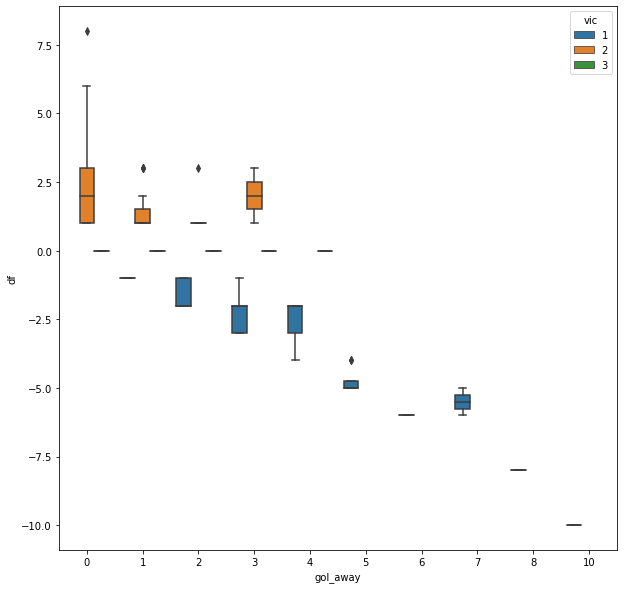

In [188]:
plt.figure(figsize = (10,10))
sns.boxplot(x = "gol_away", y = "df", hue="vic",data= mxvst)
plt.show()

En los gráficos anteriores se compara las boxplot de los distitnos casos 1: victoria, 2: derrota, 3: Empate. Comparando los goles anotados por México como visitante y la diferencia de goles del resultado del partido.

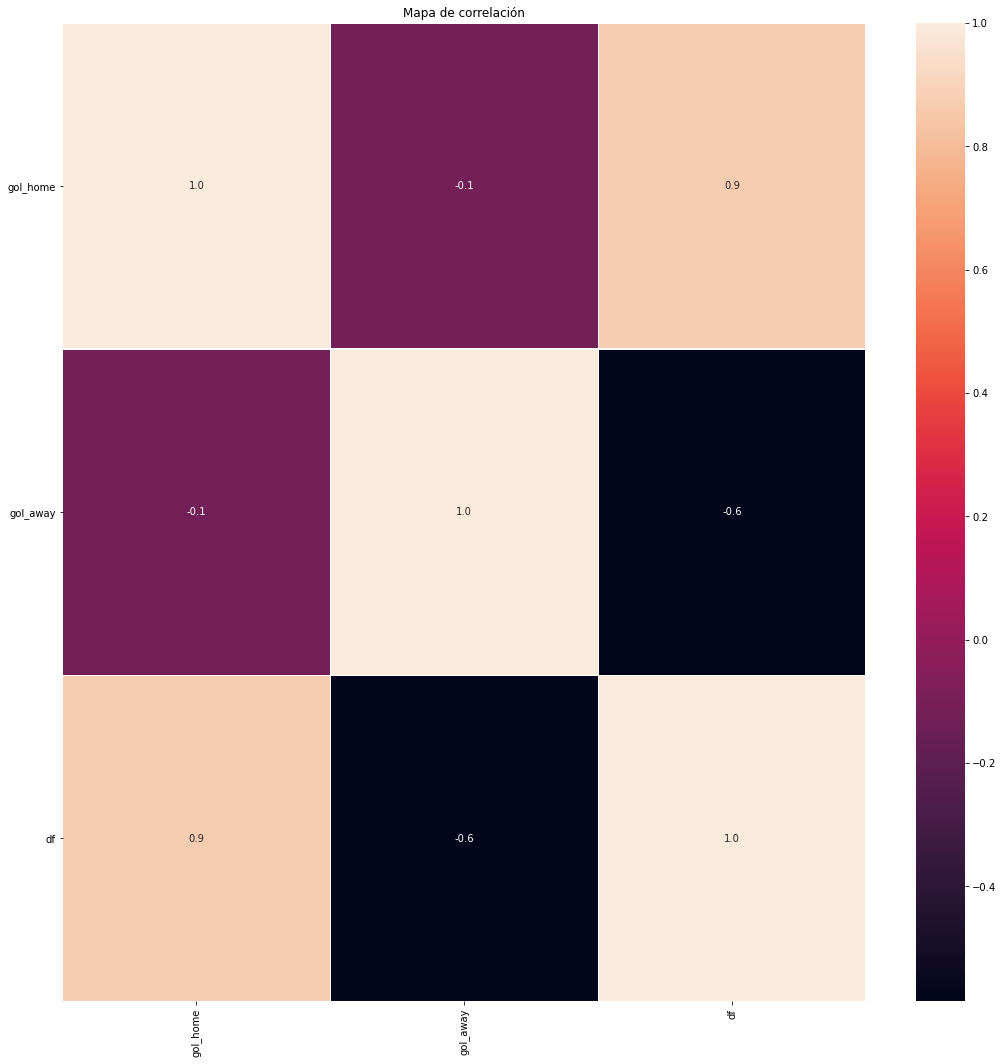

In [189]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(newmxloc.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

Este es el mapa de correlación de los goles marcados por mexico jugando como local (gol_home), los goles del rival y la diferencia de goles. Evidentemente habrá una correlación muy fuerte en la diferencia de goles dado que si depende de las 2 variables anteriores. Pero se observa que la cantidad de goles anotada por un equipo no tiene muccha correlación con la cantidad de goles anotados por el otro.

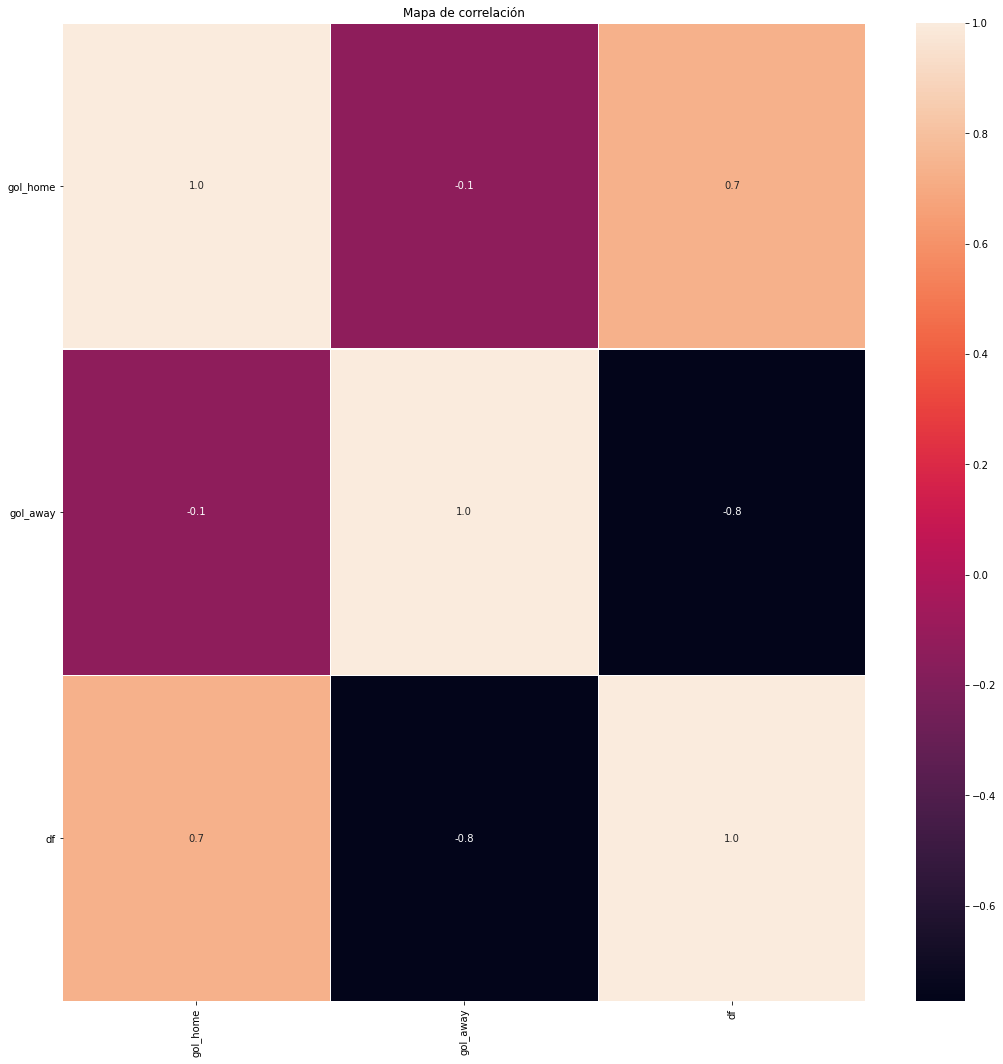

In [190]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(newmxvst.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

Este es el mapa de correlación de los goles marcados por mexico jugando como visitante (gol_haway), los goles del rival y la diferencia de goles. Evidentemente habrá una correlación muy fuerte en la diferencia de goles dado que si depende de las 2 variables anteriores. Pero se observa que la cantidad de goles anotada por un equipo no tiene muccha correlación con la cantidad de goles anotados por el otro.

# Se ha obtenido información útil en estas gráficas de visualización de datos, esto servirá para ajustar y plantear mejor las preguntas que queremos responder sobre nuestra base de datos.

# -----------------------------------------------------------------------------------------------------------

# Visualización de Base de datos secundaria

Base de datos Airlines customer satisfaction: https://www.kaggle.com/sjleshrac/airlines-customer-satisfaction

In [64]:
aero=pd.read_csv("Solo_Business-loyal.csv")
aero.index=aero.index+1
aero

,satisfaction,Gender,customer_type,Age,type_of_travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
1,satisfied,Female,Loyal Customer,54,Business travel,Business,2571,0,0,0,...,4,4,4,4,4,3,4,3,0,1.0
2,satisfied,Male,Loyal Customer,23,Business travel,Business,1955,0,0,0,...,1,1,4,3,5,3,4,1,2,4.0
3,satisfied,Female,Loyal Customer,50,Business travel,Business,2482,0,0,0,...,5,5,5,3,3,4,5,4,0,0.0
4,satisfied,Male,Loyal Customer,47,Business travel,Business,3868,0,0,0,...,4,5,5,5,5,4,5,4,0,0.0
5,satisfied,Female,Loyal Customer,65,Business travel,Business,355,0,0,0,...,3,4,4,4,4,4,4,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50265,satisfied,Female,Loyal Customer,55,Business travel,Business,83,3,3,3,...,5,5,5,5,5,3,5,5,0,0.0
50266,satisfied,Female,Loyal Customer,35,Business travel,Business,2634,5,5,5,...,4,5,5,5,5,5,5,4,0,0.0
50267,satisfied,Male,Loyal Customer,46,Business travel,Business,108,1,1,1,...,5,5,1,3,1,5,2,2,0,0.0
50268,satisfied,Female,Loyal Customer,35,Business travel,Business,83,1,1,1,...,5,5,4,4,2,5,5,5,0,0.0


# Estadística básica

In [65]:
aero['Cleanliness'].describe()

count    50269.000000
mean         3.804134
std          1.132166
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Cleanliness, dtype: float64

Se observa que en la medición de la limpieza del avión, datos importantes obtenidos con la estadsitica básica como, la media de limpieza es 3.8 en una escala de 1 al 5 con una desviacion de 1.13 por lo que la mayoria de loas aviones tienen una limpieza evaluada entre 2.7 y 4.9 

In [66]:
aero["Cleanliness"].mean()

3.8041337603692136

In [67]:
aero["Cleanliness"].median()

4.0

El 50% de las evaluaciones fueron de 4 o más en una escala de 1 al 5. Esto refleja un buen compartmiento en la limpieza

In [68]:
aero['Cleanliness'].var()

1.2817995743734265

In [69]:
aero['Cleanliness'].skew()

-0.8540124879507608

In [70]:
aero['Cleanliness'].kurt()

-0.04602508720089071

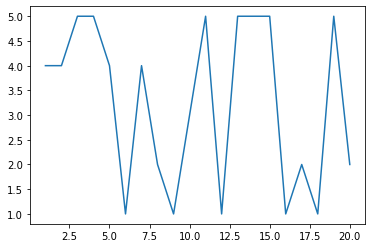

In [74]:

aero['Cleanliness'].head(20).plot.line()

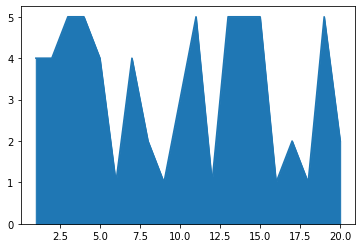

In [75]:
aero['Cleanliness'].head(20).plot.area()

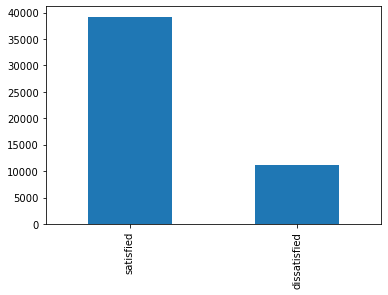

In [76]:
aero['satisfaction'].value_counts().head(10).plot.bar()

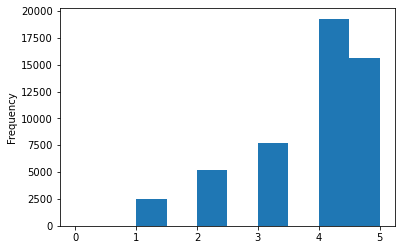

In [78]:
aero['Cleanliness'].plot.hist()

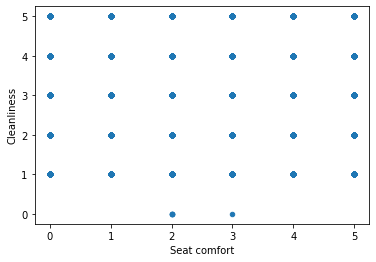

In [80]:
aero.plot.scatter(x="Seat comfort",y="Cleanliness")

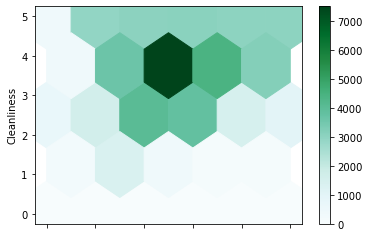

In [81]:
aero.plot.hexbin(x="Seat comfort",y="Cleanliness",gridsize=5)

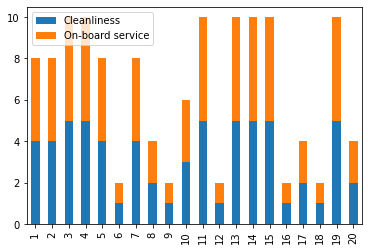

In [83]:
newaero= aero[['Cleanliness', 'On-board service']].copy()

newaero.head(20).plot.bar(stacked=True)

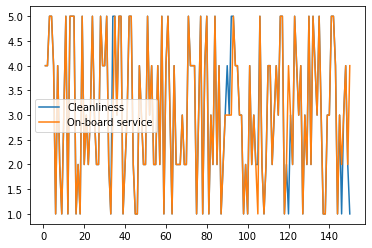

In [88]:
newaero.head(150).plot.line()

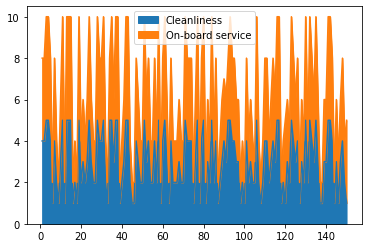

In [89]:
newaero.head(150).plot.area()

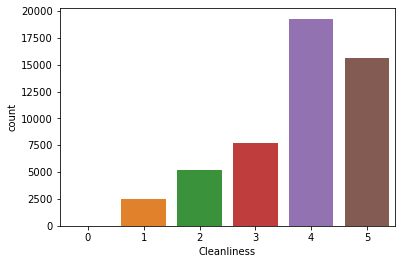

In [90]:

sns.countplot(aero['Cleanliness'])

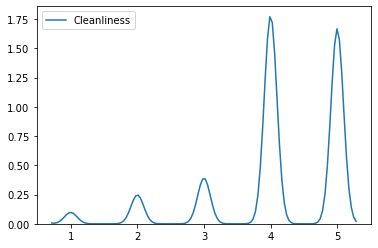

In [92]:
sns.kdeplot(aero[aero["satisfaction"]=="satisfied"].Cleanliness)

C:\Users\PC-98\anaconda3\lib\site-packages\seaborn\distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


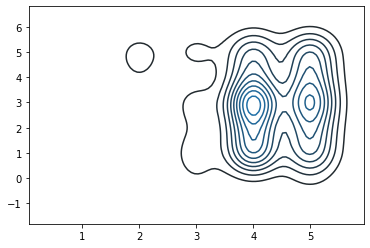

In [93]:
sns.kdeplot(aero[aero['satisfaction'] =="satisfied"].loc[:, ['Cleanliness', 'Seat comfort']].dropna().sample(100))

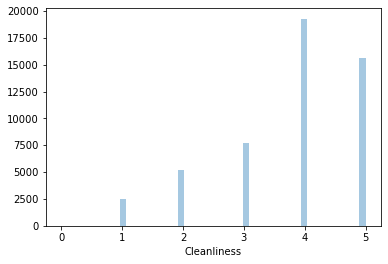

In [94]:
sns.distplot(aero['Cleanliness'], kde=False)

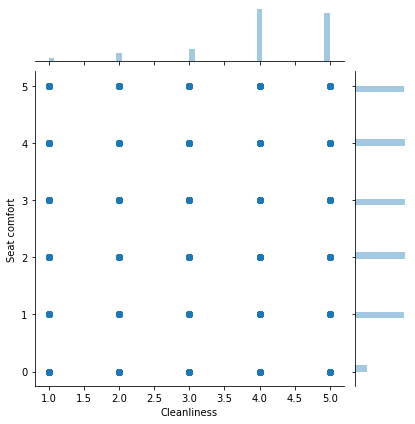

In [95]:
sns.jointplot(x='Cleanliness', y='Seat comfort', data=aero[aero['satisfaction'] =="satisfied"])

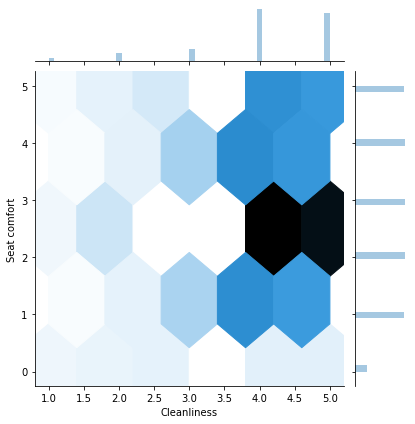

In [96]:
sns.jointplot(x='Cleanliness', y='Seat comfort', data=aero[aero['satisfaction'] =="satisfied"],kind="hex",gridsize=5)

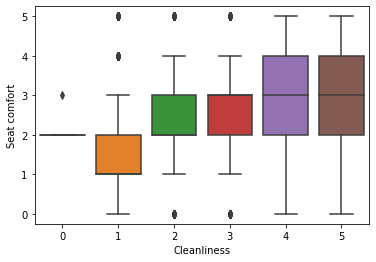

In [98]:
sns.boxplot(
    x='Cleanliness',
    y='Seat comfort',
    data=aero
)

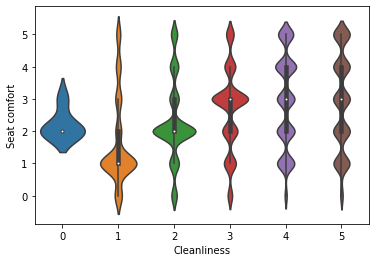

In [99]:
sns.violinplot(
    x='Cleanliness',
    y='Seat comfort',
    data=aero
)

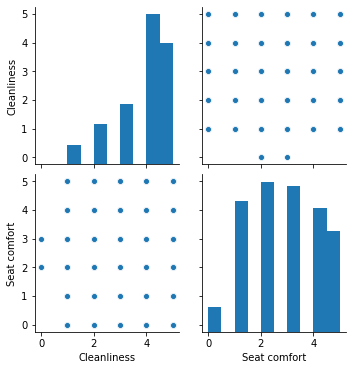

In [101]:
sns.pairplot(aero[['Cleanliness', "Seat comfort"]])

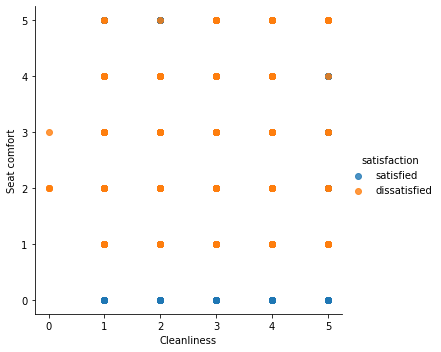

In [102]:
sns.lmplot(x='Cleanliness', y='Seat comfort', hue='satisfaction', 
           data=aero, 
           fit_reg=False)

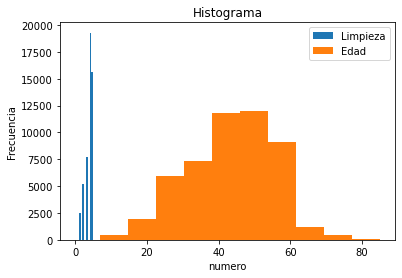

In [109]:

m = plt.hist(aero.Cleanliness,label = "Limpieza")
b = plt.hist(aero.Age,label = "Edad")
plt.legend()
plt.xlabel("numero")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

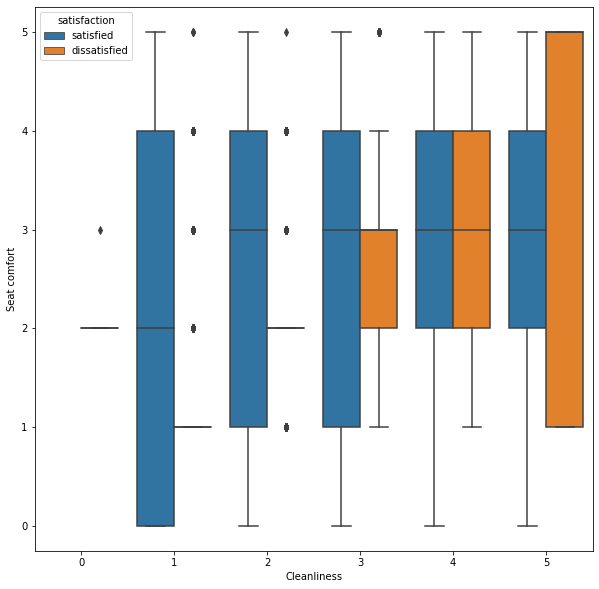

In [110]:
plt.figure(figsize = (10,10))
sns.boxplot(x = "Cleanliness", y = "Seat comfort", hue="satisfaction",data= aero)
plt.show()

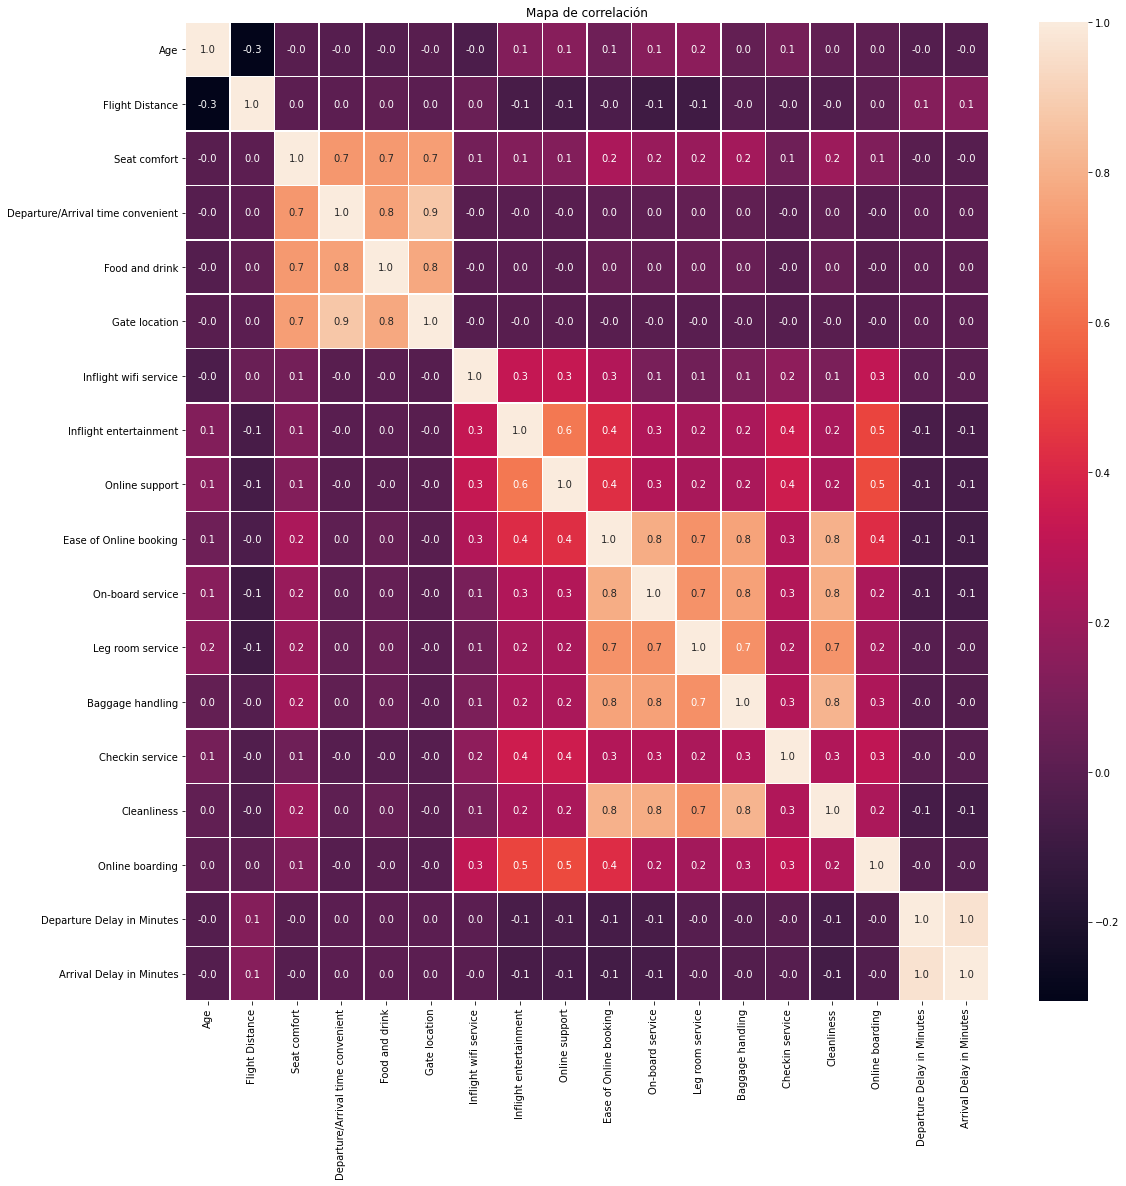

In [113]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(aero.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()